# Worksheet 16

Name:  Camille Christie
UID: U89708684

### Topics

- Support Vector Machines (Non-linear case)

## Support Vector Machines

Follow along in class to implement the perceptron algorithm and create an animation of the algorithm.

a) As we saw in class, the form
$$w^T x + b = 0$$
while simple, does not expose the inner product `<x_i, x_j>` which we know `w` depends on, having done the math. This is critical to applying the "kernel trick" which allows for learning non-linear decision boundaries. Let's modify the above algorithm to use the form
$$\sum_i \alpha_i <x_i, x> + b = 0$$

In [2]:
import numpy as np
from PIL import Image as im
import matplotlib.pyplot as plt
import sklearn.datasets as datasets

TEMPFILE = "temp.png"
CENTERS = [[0, 1], [1, 0]]

epochs = 100
learning_rate = .05
expanding_rate = .99
retracting_rate = 1.1

X, labels = datasets.make_blobs(n_samples=10, centers=CENTERS, cluster_std=0.2, random_state=0)
Y = np.array(list(map(lambda x : -1 if x == 0 else 1, labels.tolist())))

alpha_i = np.zeros((len(X),))
b = 0

def snap(x, alpha_i, b, error):
    # create a mesh to plot in
    h = .01  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    meshData = np.c_[xx.ravel(), yy.ravel()]
    cs = np.array([x for x in 'gb'])
    fig, ax = plt.subplots()
    ax.scatter(X[:,0],X[:,1],color=cs[labels].tolist(), s=50, alpha=0.8)

    if error:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='r',fill=False))
    else:
        ax.add_patch(plt.Circle((x[0], x[1]), .12, color='y',fill=False))
   
    Z = predict_many(alpha_i, b, meshData)
    Z = np.array([0 if z <=0 else 1 for z in Z]).reshape(xx.shape)
    ax.contourf(xx, yy, Z, alpha=.5, cmap=plt.cm.Paired)
    fig.savefig(TEMPFILE)
    plt.close()
    return im.fromarray(np.asarray(im.open(TEMPFILE)))

def predict_many(alpha_i, b, Z):
    res = []
    for i in range(len(Z)):
        res.append(predict(alpha_i, b, Z[i]))
    return np.array(res)

def predict(alpha_i, b, x):
    result = 0
    for j in range(len(X)):
        result += alpha_i[j] * np.dot(X[j], x)
    result += b
    return result

images = []
for _ in range(epochs):
    # pick a point from X at random
    i = np.random.randint(0, len(X))
    error = False
    x, y = X[i], Y[i]
    
    # Calculate the decision function
    decision_value = predict(alpha_i, b, x)
    
    # Check if the point is misclassified
    if y * decision_value <= 0:
        error = True
        # Update alpha_i for the misclassified point
        alpha_i[i] += learning_rate * y
        # Update the bias term
        b += learning_rate * y
    else:
        error = False
        # Optionally implement shrinking of alpha_i for correct classifications
        # alpha_i[i] = max(0, alpha_i[i] * retracting_rate)
        
    images.append(snap(x, alpha_i, b, error))

images[0].save(
    'svm_dual.gif',
    optimize=False,
    save_all=True,
    append_images=images[1:],
    loop=0,
    duration=100
)

Write a configurable kernel function to apply in lieu of the dot product. Try it out on a dataset that is not linearly separable.

In [3]:
def polynomial(x_i, x_j, c, n):
    return (np.dot(x_i, x_j) + c) ** n

c = 1  
n = 3
print(polynomial(X[0], X[1], 1, n))

1.7057141952117119


b) Assume we fit an SVM using a polynomial Kernel function and it seems to overfit the data. How would you adjust the tuning parameter `n` of the kernel function?

If it is overfitting, I would make n smaller so it doesn't learn the specifics of the training set.

c) Assume we fit an SVM using a RBF Kernel function and it seems to underfit the data. How would you adjust the tuning parameter `sigma` of the kernel function?

If it is underfitting, I would increase sigma so it gets to know more of the data.

d) Tune the parameter of a specific Kernel function, to fit an SVM (using your code above) to the following dataset:

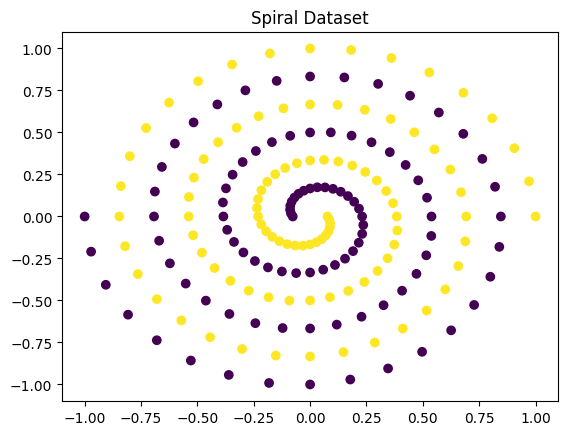

Accuracy: 0.4745762711864407


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

# Load the dataset
data = np.loadtxt("spiral.data")
x, y = data[:, :2], data[:, 2]

# Visualize the dataset
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.title("Spiral Dataset")
plt.show()

# Split the dataset into a training set and a testing set
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

# Choose a kernel function and tune its parameters (e.g., RBF kernel with gamma parameter)
best_accuracy = 0
best_gamma = None

for gamma in [0.001, 0.01, 0.1, 1, 10]:
    # Create and train the SVM model
    model = svm.SVC(kernel='rbf', gamma=gamma)
    model.fit(x_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(x_test)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Check if this gamma value gives better accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_gamma = gamma

# Train the final SVM model with the best gamma value
final_model = svm.SVC(kernel='rbf', gamma=best_gamma)
final_model.fit(x_train, y_train)

# Evaluate the final model on the test set
y_pred = final_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", test_accuracy)

